# Classification Model Validation
Once we are able to work with data effectively and create models, we need a way to evaluate if these models are any good.  If the models are not performing well we will also need further details to make sure we can fix them properly.

## Scoring
It should be impossible to create a model that is never wrong, this is due to outliers in data, using a bad estimator (or poorly tuned estimator), or data just not following the rules of an algorithm.  To determine how good an estimator is we need to score its ability to make predictions.  We have a problem however, we need a way to give the model a test, but we need to know the answers to the test and the model can't see the answers during its training.  This would be analagous to you getting an old copy of one of my tests and memorizing it, even though you would do great on the test it wouldn't measure your knowledge of the material.

Luckily the way we fix this problem isn't very complicated, we split the data into training data (used to fit the model) and testing data (used to validate the model).  After we train the model, we can make prediction on the test data and then compare the results to ground truth.  This ensures that any predictions the model makes are based on its understanding of the material, not memorizing the answers.  This does introduce one problem, we now have less data to train the model with! 

In [1]:
from sklearn.dummy import DummyClassifier
from sklearn.datasets import make_classification

model = DummyClassifier()
X, y = make_classification(n_samples=1000, n_classes=5, n_informative=4)

# create training and testing subsets
X_train, X_test = X[:750], X[750:]
y_train, y_test = y[:750], y[750:]

# train the model
model.fit(X_train, y_train)

# use x to make predictions, compare these with y
test_score = model.score(X_test, y_test)
print(f'test score: {test_score}')

test score: 0.184


You can treat this test just like a test you would take, look at the score above and see if you would be happy with it.  Another way to think about this is that guessing a coin flip is a 50-50 guess, we should be close to getting everything right (1.0) than to a coin flip (0.5).  This is somewhat arbitrary but we'll say anything greater than 0.75 is a 'good' score.

### Test Train Split
In the previous example we manually split out data, sklearn comes with helper functions to create training and testing sets.  The train_test_split function returns your data split for you.  Typically during development we will specify a random_state which will give us the same random sample each time we run the script.  Something to watch for is the class balance per group, after splitting your data there is a chance that the number of labels will be drastically different for training and testing.  If you are working with a clasification problem you can specify the stratify argument, this will tell train_test_split to keep the labels evenly balanced between training and testing sets.

* shuffle - if samples should be randomized
* random_state - seed for random data sampling
* test_size - how to split data, default is 0.75 train and 0.25 test
* stratify - which feature to use for even distribution

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)

(750, 20)


## Precision and Recall
Just looking at the score for a classification estimator is useful, but it also not the entire picture.  The classification report generates additional metrics for your classifier that give a better idea of how it is actually performing.  One additional metric this report gives us is the score per label.  Perhaps our model has a good score overall (precision), but with one label is just can't get right (class balance perhaps?). 

A new metric the report gives us is the recall, this is how many labels did we predict out of the possible number of labels.  This metric is important when there is a specific label that want to identify all cases of.  If we are analyzing somebody's x-ray trying to detect malignant growths then we would definitely want to identify all 'malignant' labels, even if our model has worse overall precision. 

* precision - how often right (correct guesses / total guesses)
* recall - number of labels found (correct guesses / number of possbible correct guesses)
* f1  - mean of precision and recall
* support - number of labels in data

In [4]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

X, y = make_classification(n_samples=1000, n_classes=5, n_informative=4)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.56      0.65      0.60        48
          1       0.39      0.71      0.50        42
          2       0.55      0.65      0.59        51
          3       0.76      0.36      0.49        61
          4       0.72      0.44      0.55        48

avg / total       0.61      0.55      0.55       250



## Confusion Matrix
In the classification report we were able to see the precision and recall of specific labels, though we couldn't see what the model predicted when it was wrong.  A confusion matrix shows the quality of a classifiers output by showing what the model picked when it was incorrect.  We show a confusion matrix with a seaborn heatmap and the confusion matrix function, each row/column correspond to a possible label.  Having high values on the diagonal indicate good predictive capabilities (when the correct label was 0 we picked 0, when it was 1 we picked 1, etc).  The confusion_matrix function takes in a ground truth and then a prediction for those values.

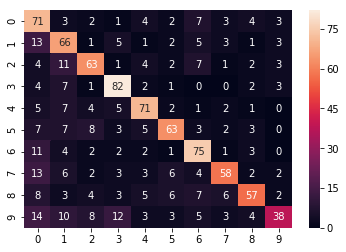

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_classes=10, n_informative=5)

model = KNeighborsClassifier()
model.fit(X, y)

cmat = confusion_matrix(y, model.predict(X))
sns.heatmap(cmat, annot=True)
plt.show()

# Workflow
There is not a strict blueprint for how to complete a machine learning problem, with varying data the workflow for each problem will be drastically different.  This general workflow can help, but shouldn't be strictly followed.  As the course progresses we will uncover more and transition from naive approaches to more robust.

<td> <img src="images\ml_workflow02.png" alt="Drawing" style="width:850px;"/> </td>

# OK
Now we have a basic idea of the train test loop, machine learning is a cycle where you start simple and further refine your model based on validation.  There are actually still a few naive processes in place that we will further refine through the class.  